# Python Analysis for Housing Agency

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [2]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Median value of owner-occupied homes')

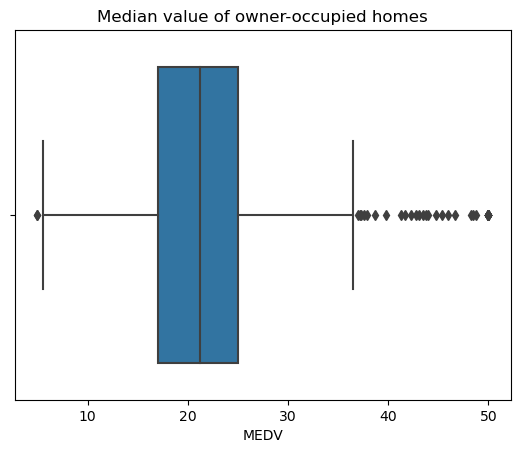

In [3]:
Boxplot = sns.boxplot(x='MEDV', data = boston_df)
Boxplot.set_title('Median value of owner-occupied homes')

## Provide a  bar plot for the Charles river variable

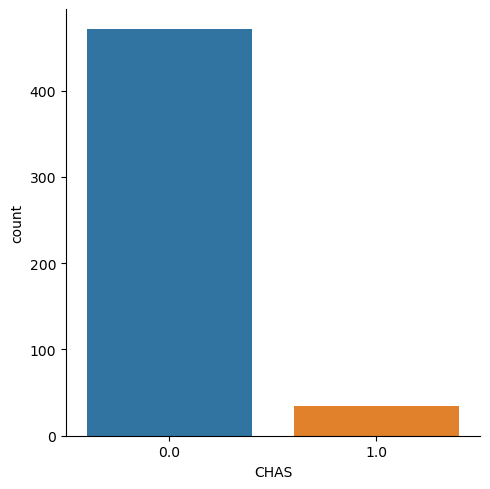

In [4]:
sns.catplot(x='CHAS', kind='count', data = boston_df)

## Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0.5, 1.0, 'MEDV variable vs the AGE variable')

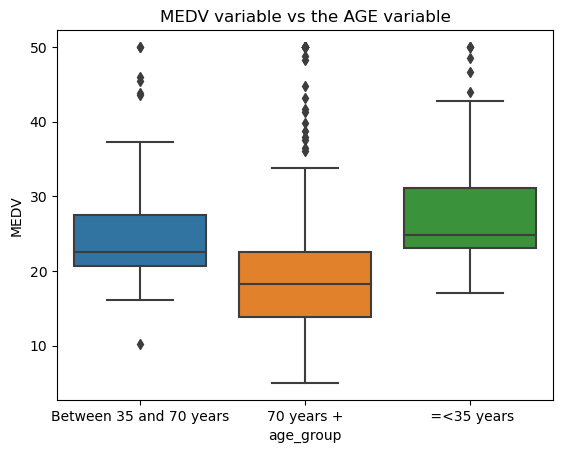

In [5]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = ' =<35 years'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years +'

boxplot2 = sns.boxplot(x="age_group", y="MEDV", data=boston_df)
boxplot2.set_title('MEDV variable vs the AGE variable')

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')

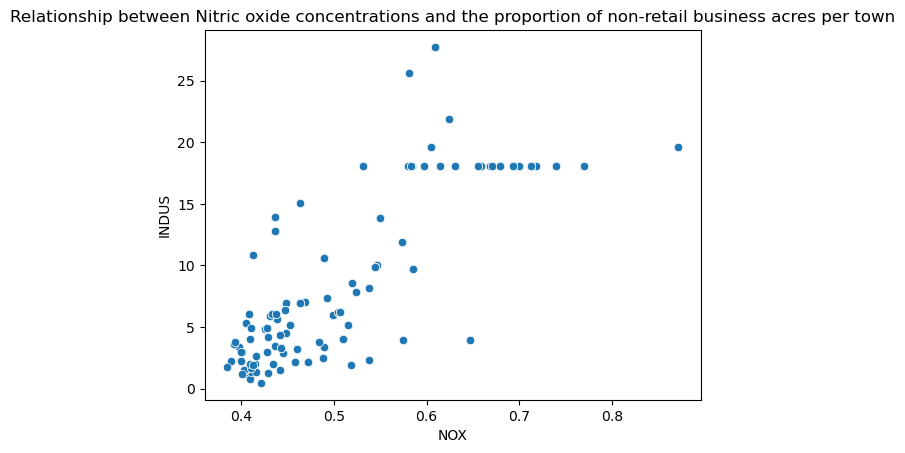

In [6]:
Scatterplot = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
Scatterplot.set_title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')

## Create a histogram for the pupil to teacher ratio variable


/tmp/wsuser/ipykernel_350/3181183697.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  histogram = sns.distplot(boston_df['PTRATIO'], kde = False)


Text(0.5, 1.0, 'Pupil to teacher ratio')

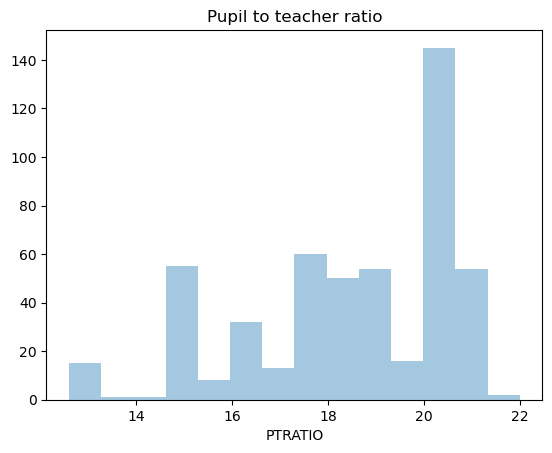

In [7]:
histogram = sns.distplot(boston_df['PTRATIO'], kde = False)
histogram.set_title('Pupil to teacher ratio')

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)



NULL: There is no significant relationship between the median value of houses that are bounded and not bounded by the Charles River.
 



ALTERNATIVE: There is a significant relationship between the median value of houses that are bounded and not bounded by the Charles River.

In [8]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

The Null Hypothesis is rejected since there is a significant statistical difference.


## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

NULL: There is no significant relationship between the median value of houses for each proportion of owner occupied units built prior to 1940.
 



ALTERNATIVE: There is a significant relationship between the median value of houses for each proportion of owner occupied units built prior to 1940.

In [13]:
thirtyfiveless = boston_df[boston_df['age_group'] == ' =<35 years']['MEDV']
thirtyfivetoseventy = boston_df[boston_df['age_group'] == 'Between 35 and 70 years']['MEDV']
seventyplus = boston_df[boston_df['age_group'] == '70 years +']['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(thirtyfiveless, thirtyfivetoseventy, seventyplus)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic, p_value))
print(len(thirtyfiveless), len(thirtyfivetoseventy), len(seventyplus))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15
91 128 287


The Null Hypothesis is rejected since there is a significant statistical difference by the small p-value being less than 0.05.

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

NULL: There is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
 



ALTERNATIVE: There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [14]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

The small p-value allows for the rejection of the Null Hypothesis.

## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

NULL: There is no significant relationship between an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

    
    
ALTERNATIVE: There is a significant relationship between an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

In [15]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           1.21e-08
Time:                        07:12:07   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the p-value here is less than 0.05, the Null hypothesis is rejected.